In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import time
import random
import datetime
import operator
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('seaborn')
%matplotlib inline

C:\Users\Vamshi Krishna\AppData\Local\Temp\ipykernel_14772\1252845292.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [16]:
#Loading all the datasets
confirmed_cases=pd.read_csv(r"C:\Users\Vamshi Krishna\Downloads\Coronavirus prediction analysis - March\Coronavirus prediction analysis\time_series_covid-19_confirmed.csv")

In [17]:
deaths_reported=pd.read_csv(r"C:\Users\Vamshi Krishna\Downloads\Coronavirus prediction analysis - March\Coronavirus prediction analysis\time_series_covid-19_deaths.csv")

In [18]:
recovered_cases=pd.read_csv(r"C:\Users\Vamshi Krishna\Downloads\Coronavirus prediction analysis - March\Coronavirus prediction analysis\time_series_covid-19_recovered.csv")

In [19]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [20]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [22]:
#Extracting all the coloumns using the .keys() function
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [23]:
#Extracting only the date coloumns that have information of confirmed,deaths and recovered cases

confirmed=confirmed_cases.loc[:, cols[4]:cols[-1]]

In [24]:
deaths=deaths_reported.loc[:, cols[4]:cols[-1]]

In [25]:
recoveries=recovered_cases.loc[:, cols[4]:cols[-1]]

In [26]:
#Check the head of confirmed cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [27]:
#Finding the total confirmed cases,death cases and recovered cases and append them into 4 lists
#Also calculating the total morality rate 
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [28]:
death_sum

6440

In [29]:
recovered_sum

76034

In [30]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [31]:
#Convert all the dates and the cases in the form of an array
import numpy as np
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [32]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [33]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]], dtype=int64)

In [34]:
total_deaths

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440]], dtype=int64)

In [29]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034]], dtype=int64)

In [35]:
#Future forecasting for 10 days
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [36]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [37]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [38]:
#For visualization with the latest data of 15th of March
latest_confirmed=confirmed_cases[dates[-1]]
latest_dates=deaths_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [39]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [40]:
latest_dates

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [41]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [42]:
#Find the list of unique countries
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [43]:
# Finding the total number of confirmed cases by each country
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

# Sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

# Update country_confirmed_cases according to the sorted unique_countries
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region'] == unique_countries[i]].sum()


In [44]:
#Number of cases per country/region
print('Confirmed cases by Countries/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Region:
China:81003 cases
Italy:24747 cases
Iran:13938 cases
Korea, South:8162 cases
Spain:7798 cases
Germany:5795 cases
France:4513 cases
US:3499 cases
Switzerland:2200 cases
Norway:1221 cases
United Kingdom:1144 cases
Netherlands:1135 cases
Sweden:1022 cases
Belgium:886 cases
Denmark:875 cases
Austria:860 cases
Japan:839 cases
Cruise Ship:696 cases
Malaysia:428 cases
Qatar:401 cases
Greece:331 cases
Australia:297 cases
Czechia:253 cases
Canada:252 cases
Israel:251 cases
Portugal:245 cases
Finland:244 cases
Singapore:226 cases
Slovenia:219 cases
Bahrain:214 cases
Estonia:171 cases
Iceland:171 cases
Brazil:162 cases
Philippines:140 cases
Romania:131 cases
Ireland:129 cases
Poland:119 cases
Indonesia:117 cases
Iraq:116 cases
Thailand:114 cases
India:113 cases
Kuwait:112 cases
Egypt:110 cases
Lebanon:110 cases
Saudi Arabia:103 cases
San Marino:101 cases
United Arab Emirates:98 cases
Chile:74 cases
Russia:63 cases
Luxembourg:59 cases
Taiwan*:59 cases
Vietnam:5

In [45]:
#Find the list of unique provinces
unique_provinces=list(confirmed_cases['Province/State'].unique())
#Outliers removal
outliers=['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [46]:
#Finding the number of confirmed cases per province,state or city
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)        

In [47]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [48]:
nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)

unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

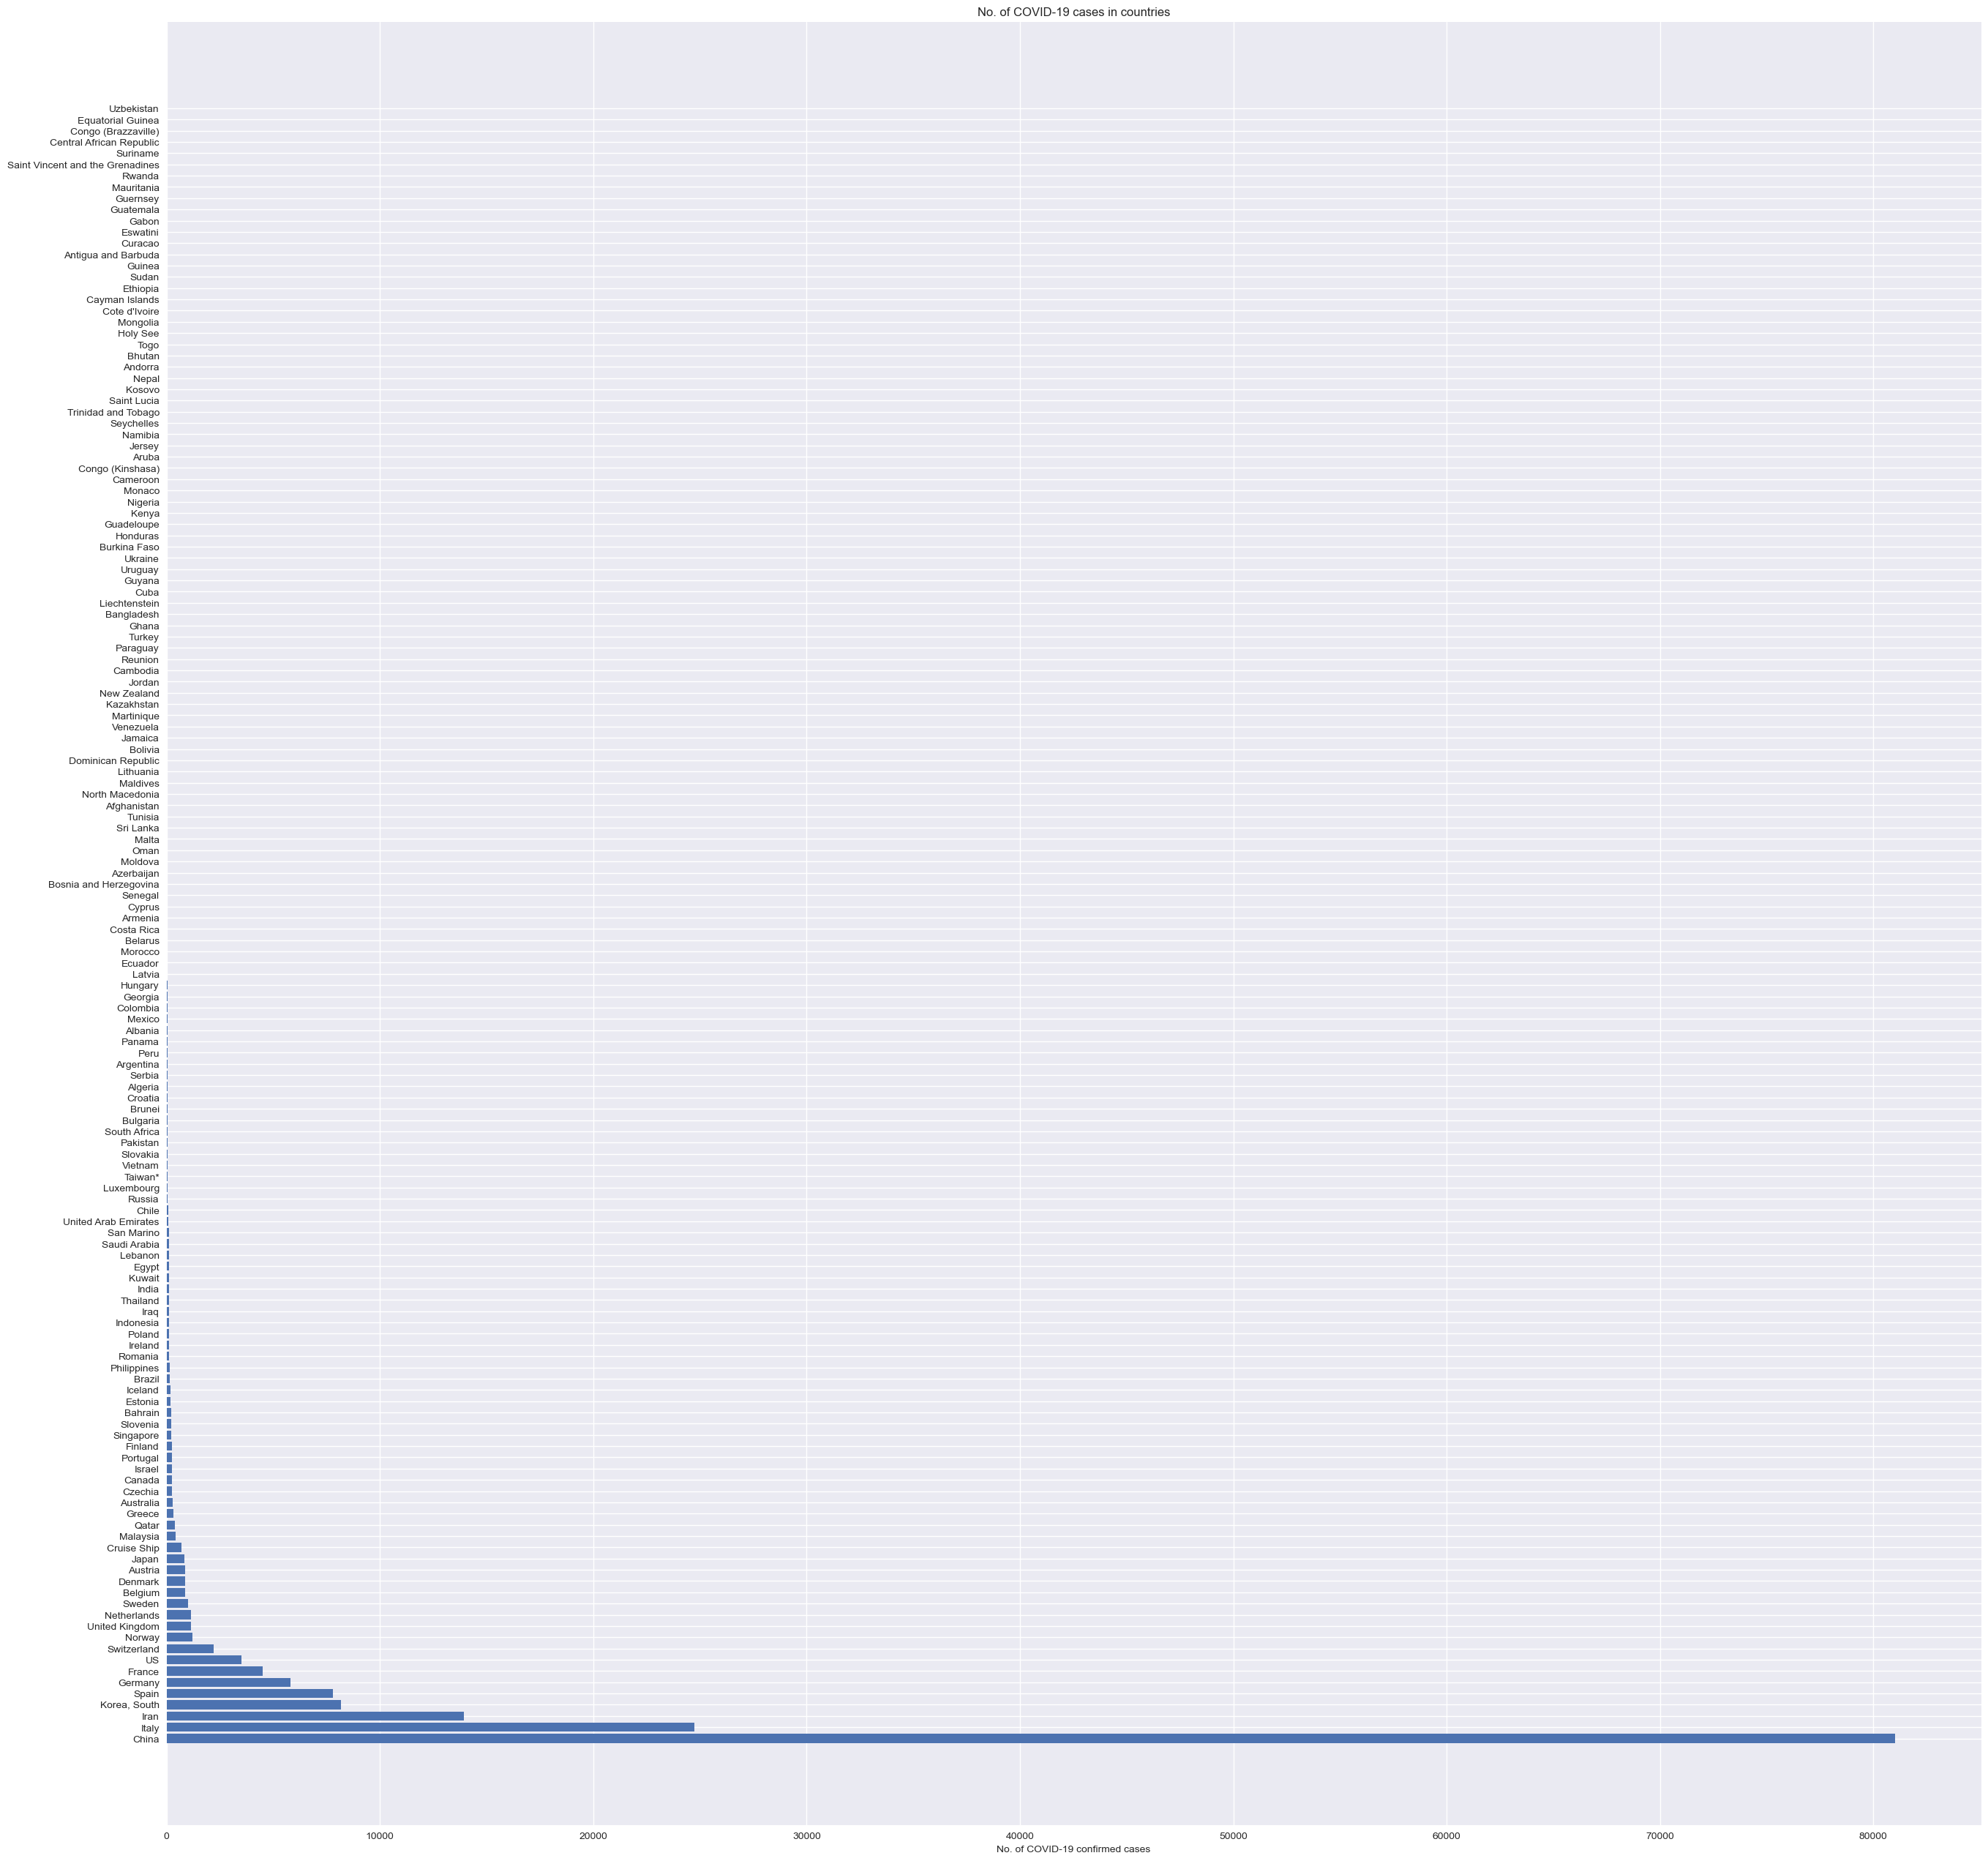

In [49]:
#Plotting the bar graph to see the total confirmed cases across different countries
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('No. of COVID-19 cases in countries')
plt.xlabel('No. of COVID-19 confirmed cases')
plt.show()

In [50]:
# Top 10 countries with most confirmed cases
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

# Print the output
print("Countries: ", visual_unique_countries)
print("Confirmed Cases: ", visual_confirmed_cases)


Countries:  ['China', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany', 'France', 'US', 'Switzerland', 'Norway', 'Others']
Confirmed Cases:  [81003, 24747, 13938, 8162, 7798, 5795, 4513, 3499, 2200, 1221, 14573]


In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR

# Define hyperparameters
kernel = ['poly', 'sigmoid', 'rbf']
C = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

# Create a dictionary containing the hyperparameter grid
svm_grid = {'kernel': kernel, 'C': C, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

# Create SVR model
svm = SVR()

# Split the data into training and testing sets
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

# Perform randomized search cross-validation
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)

# Fit the randomized search to the training data
svm_search.fit(X_train_confirmed, y_train_confirmed)

# Get the best parameters found during the search
best_params = svm_search.best_params_

# Get the best estimator found during the search
best_estimator = svm_search.best_estimator_

# Make predictions on future data using the best estimator
svm_pred = best_estimator.predict(future_forecast)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
best_params

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1, 'C': 0.01}

In [63]:
best_estimator

SVR(C=0.01, epsilon=1, gamma=0.1, kernel='poly', shrinking=False)

In [64]:
svm_pred

array([ 30388.34440129,  30389.32185622,  30396.1640407 ,  30414.73568429,
        30450.90151654,  30510.52626702,  30599.47466527,  30723.61144085,
        30888.80132331,  31100.90904222,  31365.79932711,  31689.33690756,
        32077.38651311,  32535.81287332,  33070.48071775,  33687.25477594,
        34391.99977746,  35190.58045185,  36088.86152868,  37092.7077375 ,
        38207.98380786,  39440.55446933,  40796.28445144,  42281.03848376,
        43900.68129585,  45661.07761726,  47568.09217753,  49627.58970624,
        51845.43493293,  54227.49258716,  56779.62739848,  59507.70409644,
        62417.58741062,  65515.14207054,  68806.23280579,  72296.7243459 ,
        75992.48142043,  79899.36875894,  84023.25109098,  88369.99314611,
        92945.45965388,  97755.51534385, 102806.02494557, 108102.8531886 ,
       113651.86480248, 119458.92451679, 125529.89706107, 131870.64716488,
       138487.03955776, 145384.93896929, 152570.210129  , 160048.71776646,
       167826.32661123, 1

Mean Squared Error: 284717873.5156596
Mean Absolute Error: 16263.289241035274


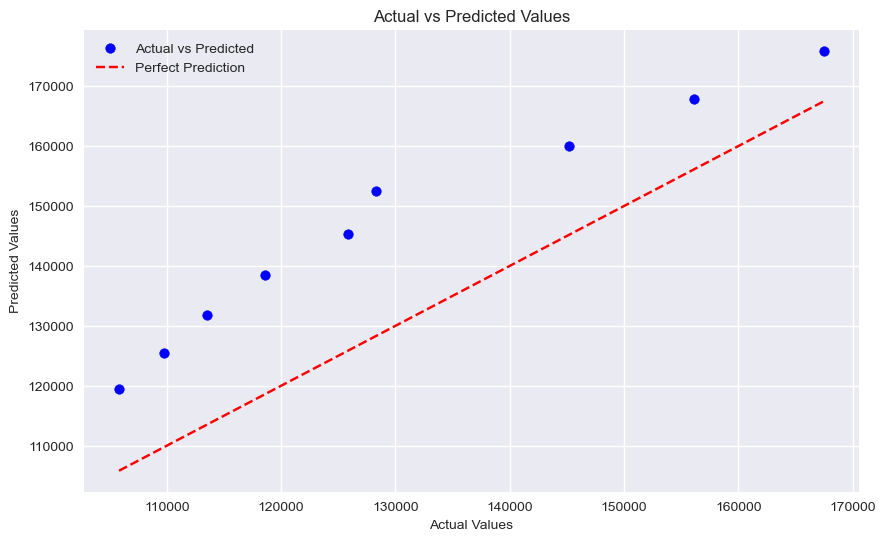

In [67]:
import matplotlib.pyplot as plt
# Make predictions on the test set using the best estimator
predictions = best_estimator.predict(X_test_confirmed)
# Evaluate the model performance using mean squared error (MSE)
mse = mean_squared_error(y_test_confirmed, predictions)
print("Mean Squared Error:", mse)
# Evaluate the model performance using mean absolute error (MAE)
mae = mean_absolute_error(y_test_confirmed, predictions)
print("Mean Absolute Error:", mae)
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_confirmed, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_confirmed), max(y_test_confirmed)], [min(y_test_confirmed), max(y_test_confirmed)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

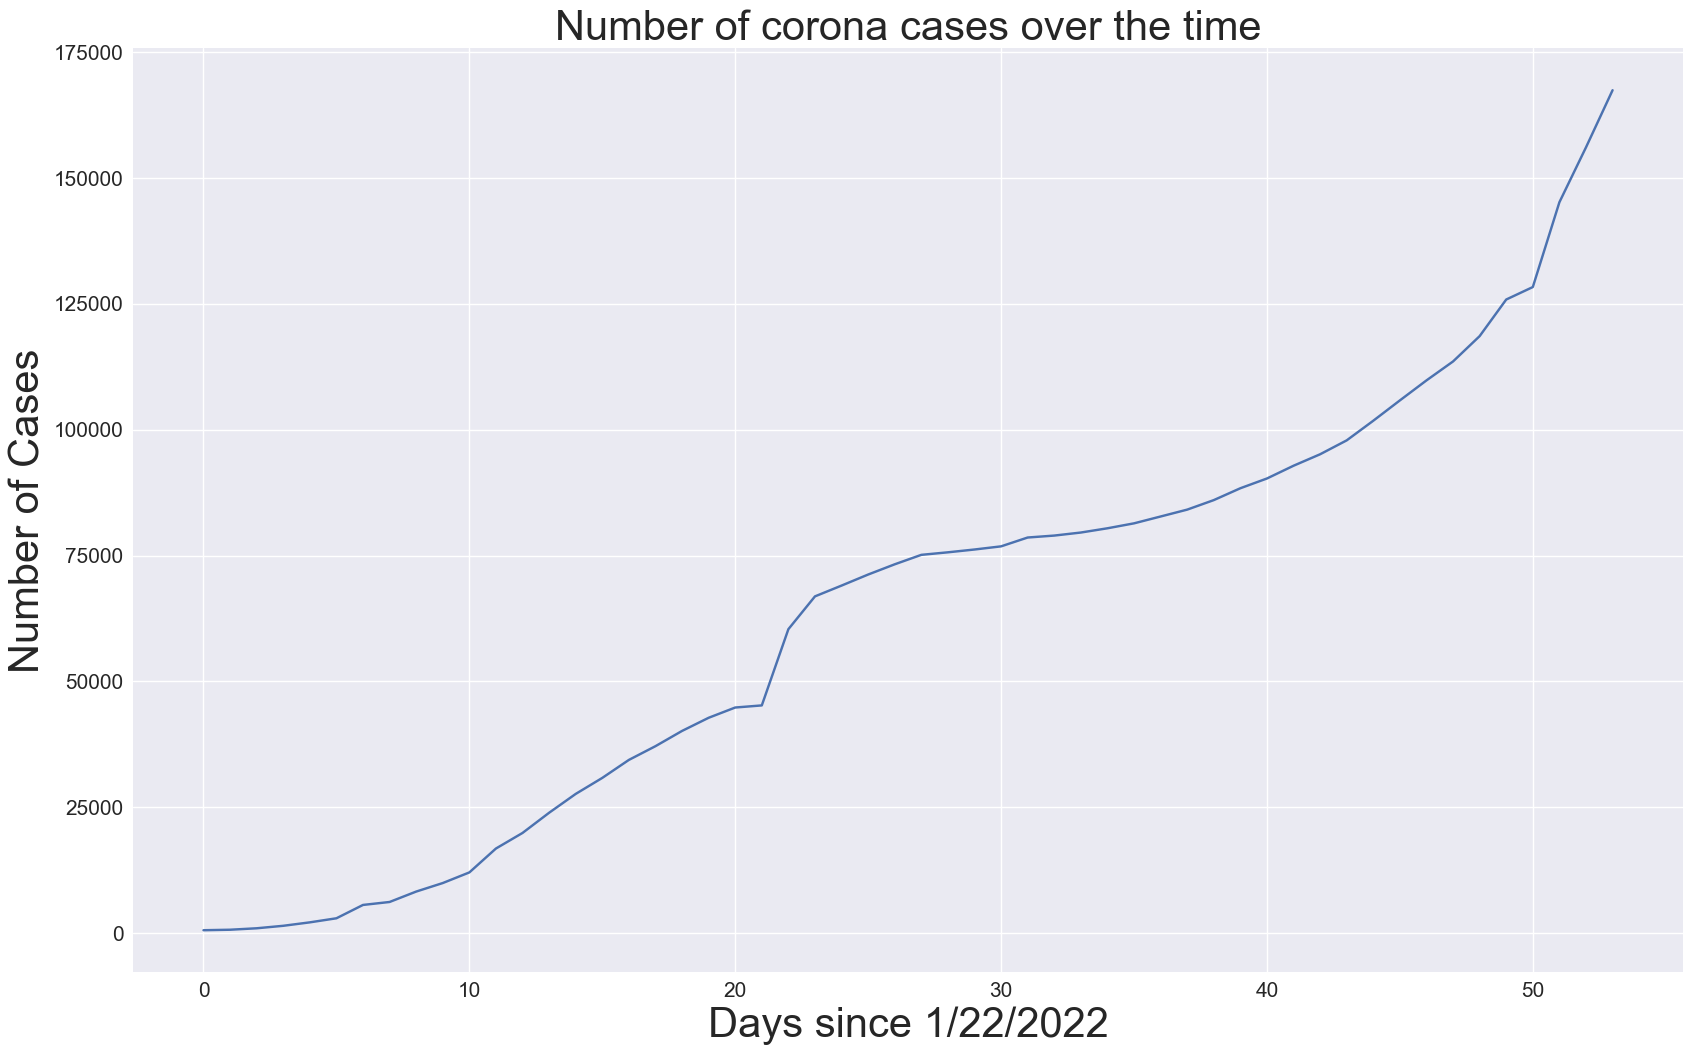

In [69]:
#Total number of cases over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of corona cases over the time',size=30)
plt.xlabel('Days since 1/22/2022',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [81]:
#Predictions for the next 10 days using svm
print('SVM future predictions: ')
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM future predictions: 


{('03/16/2020', 184302.30684087562),
 ('03/17/2020', 193012.40768487248),
 ('03/18/2020', 202045.06865439066),
 ('03/19/2020', 211406.1544789848),
 ('03/20/2020', 221101.52988820986),
 ('03/21/2020', 231137.05961162096),
 ('03/22/2020', 241518.608378773),
 ('03/23/2020', 252252.04091922112),
 ('03/24/2020', 263343.2219625192),
 ('03/25/2020', 274798.01623822347)}